<a href="https://colab.research.google.com/github/JunEden/Tensorflow/blob/main/%E3%80%8CMobileNetV3_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install python3.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.6 is already the newest version (3.6.9-1~18.04ubuntu1.4).
python3.6 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
!pip install keras==2.2.4
!pip install numpy==1.19.5
!pip install pandas==1.1.5
!pip install tensorflow==2.5.0
!wget https://bootstrap.pypa.io/get-pip.py
!sudo python3.6 get-pip.py

     |████████████████████████████████| 312 kB 5.0 MB/s 
     |████████████████████████████████| 50 kB 7.4 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.0 requires keras<2.8,>=2.7.0rc0, but you have keras 2.2.4 which is incompatible.
     |████████████████████████████████| 454.3 MB 15 kB/s 
     |████████████████████████████████| 1.2 MB 45.7 MB/s 
     |████████████████████████████████| 4.0 MB 44.2 MB/s 
     |████████████████████████████████| 462 kB 64.5 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68719 sha256=160f2db97993c14cf2cebe40ad9e354797d77589475ea70ea11765eca7adef6f
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f

In [ ]:
!cp -r /usr/local/lib/python3.7/dist-packages /usr/local/lib/python3.6/

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils




In [ ]:
from tensorflow import keras
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [ ]:
history = LossHistory()

In [ ]:
import glob
import pandas as pd 
good = glob.glob("/content/drive/MyDrive/poo_p_Augment/p*")
bad = glob.glob("/content/drive/MyDrive/bad_poo_p_Augment/bad_poo_*")
df = pd.DataFrame({
    "path":good + bad,
    "ans":[0] * len(good) + [1] * len(bad)
})
df

,path,ans
0,/content/drive/MyDrive/poo_p_Augment/p (858)-8...,0
1,/content/drive/MyDrive/poo_p_Augment/p (858)-9...,0
2,/content/drive/MyDrive/poo_p_Augment/p (858)-1...,0
3,/content/drive/MyDrive/poo_p_Augment/p (496)-6...,0
4,/content/drive/MyDrive/poo_p_Augment/p (496)-7...,0
...,...,...
20250,/content/drive/MyDrive/bad_poo_p_Augment/bad_p...,1
20251,/content/drive/MyDrive/bad_poo_p_Augment/bad_p...,1
20252,/content/drive/MyDrive/bad_poo_p_Augment/bad_p...,1
20253,/content/drive/MyDrive/bad_poo_p_Augment/bad_p...,1


In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet,preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization
from tensorflow.keras.layers import Dropout

import matplotlib.pyplot as plt
model = tf.keras.applications.MobileNetV3Small(include_top=False, input_shape=(224, 224, 3))
# for l in cnn.layers:
#     l.trainable = False
# layers = [
#     BatchNormalization(),
#     GlobalAveragePooling2D(),
#     Dense(2, activation="softmax")
# ]
#model = Sequential(cnn.layers + layers)
model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling_2[0][0]']            
                                )                                                                 
                                                                                   

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

p = "/content/test1.jpg"
idx = random.randint(0, len(p)-1)
img = Image.open(p[idx]).resize((224, 224)).convert("RGB")
img_np = np.array(img)
img_np_pre = preprocess_input(img_np)
print(img_np_pre)
plt.imshow(img)

In [ ]:
x = np.array(df["path"])
y = np.array(df["ans"])

In [ ]:
from PIL import Image

def data_generator(x, y, batch_size=20):
    while True:
        idx = np.random.randint(0, len(x), size=batch_size)
        x_batch, y_batch = x[idx], y[idx]
        x_final = []
        for path in x_batch:
            img = Image.open(path).resize((224, 224)).convert("RGB")
            img_pre = preprocess_input(np.array(img))
            x_final.append(img_pre)
        x_final = np.array(x_final)
        y_batch = np.array(y_batch)
        yield (x_final, y_batch)
gen = data_generator(x, y)
x_gen, y_gen = gen.__next__()
print(x_gen.shape)
print(y_gen.shape)

(20, 224, 224, 3)
(20,)


In [ ]:
from sklearn.model_selection import train_test_split
goodx = x[y == 0]
badx = x[y == 1]
good120 = np.random.choice(goodx, 11000, replace=False)
good900, good100 = train_test_split(good120, test_size=0.1)
bad100 = np.random.choice(badx, 9000, replace=False)
bad100, bad10 = train_test_split(bad100, test_size=0.1)
x_train = np.concatenate((good900, bad100))
y_train = np.array([0] * len(good900) + [1] * len(bad100))
x_test = np.concatenate((good100, bad10))
y_test = np.array([0] * len(good100) + [1] * len(bad10))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18000,)
(2000,)
(18000,)
(2000,)


In [ ]:
train_generator = data_generator(x_train, y_train)
test_generator = data_generator(x_test, y_test)

In [ ]:
model.fit_generator(train_generator,  #steps_per_epoch=每次美45張*上面的batch_size數量
                    steps_per_epoch=50,
                    #跑幾次訓練
                    epochs=7,
                    validation_data=test_generator,
                    validation_steps=5,
                    callbacks=[history])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
50/50 [==============================] - 488s 10s/step - loss: 2.6728 - accuracy: 0.4363 - val_loss: 6.1754 - val_accuracy: 0.0000e+00
Epoch 2/10
50/50 [==============================] - 447s 9s/step - loss: 0.6753 - accuracy: 0.4918 - val_loss: 6.2486 - val_accuracy: 0.0000e+00
Epoch 3/10
50/50 [==============================] - 422s 9s/step - loss: 0.7057 - accuracy: 0.4974 - val_loss: 6.5242 - val_accuracy: 0.0000e+00
Epoch 4/10
50/50 [==============================] - 395s 8s/step - loss: 0.8043 - accuracy: 0.5236 - val_loss: 4.4103 - val_accuracy: 0.0000e+00
Epoch 5/10
50/50 [==============================] - 384s 8s/step - loss: 0.6996 - accuracy: 0.5337 - val_loss: 4.0537 - val_accuracy: 0.0000e+00
Epoch 6/10
50/50 [==============================] - 354s 7s/step - loss: 1.2559 - accuracy: 0.5263 - val_loss: 1.9618 - val_accuracy: 0.4880
Epoch 7/10
50/50 [==============================] - 332s 7s/step - loss: 0.6879 - accuracy: 0.5182 - val_loss: 1.4849 - val_accuracy:

In [ ]:
testx, testy = test_generator.__next__()
model.predict(testx)

array([[0.99853504, 0.0014649 ],
       [0.99236226, 0.00763778],
       [0.99537474, 0.00462531],
       [0.34590858, 0.6540914 ],
       [0.21230952, 0.78769046],
       [0.84978694, 0.15021303],
       [0.53588057, 0.46411943],
       [0.7370746 , 0.26292536],
       [0.9931938 , 0.00680624],
       [0.9715452 , 0.02845484],
       [0.9883847 , 0.01161532],
       [0.96777123, 0.03222878],
       [0.24703331, 0.7529667 ],
       [0.99012697, 0.00987309],
       [0.97903   , 0.02096998],
       [0.8228571 , 0.1771429 ],
       [0.9560859 , 0.04391411],
       [0.4055109 , 0.59448904],
       [0.9887742 , 0.01122577],
       [0.6193899 , 0.38061005]], dtype=float32)

In [ ]:
ori_imgs = []
for p in x_test:
    img = Image.open(p).resize((224, 224)).convert("RGB")
    ori_imgs.append(np.array(img))
ori_imgs = np.array(ori_imgs)
preprocess_imgs = preprocess_input(ori_imgs)
pre = model.predict(preprocess_imgs).argmax(axis=1)

KeyboardInterrupt: ignored

In [ ]:
trans = ["Good", "Bad"]
idx = np.nonzero(pre != y_test)[0]
pre_false_img = ori_imgs[idx]
pre_false_val = pre[idx]
pre_false_ori = y_test[idx]

plt.figure(figsize=(150, 150))
width = 20
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_ori[i]],
                                trans[pre_false_val[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])

NameError: ignored

Enter:https://pic.pimg.tw/hdouzih/417af6ffa9b8efe44485861b48e67c01.jpg
預測: Bad
機率: [0.00569884 0.9943012 ]


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


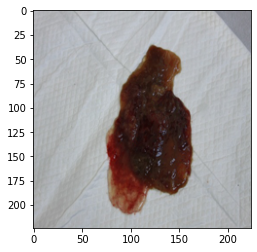

In [ ]:
import requests
url = input("Enter:")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((224, 224)).convert("RGB")
img_np = preprocess_input(np.array(img).reshape(1, 224, 224, 3))
proba = model.predict(img_np)
ans = proba.argmax(axis=1)
print("預測:", trans[ans[0]])
print("機率:", proba[0])
plt.imshow(img)

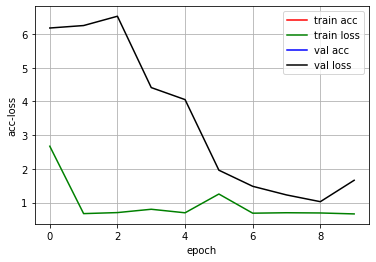

In [ ]:
#讀圖
history.loss_plot('epoch')

In [ ]:
model.save("MobilE_Poop.h5")

In [ ]:
model.save_weights("weight_Poop.h5")